In [81]:
import os
os.chdir("/u/home/s/skikuchi/scratch/BIOMATH206")
import sys
import numpy as np
import networkx as nx

In [142]:
import pandas as pd
GRN = pd.read_csv("/u/home/s/skikuchi/scratch/BIOMATH206/grn/adj2_RB05.csv")
GRN['importance'] = GRN['importance']

In [143]:
GRN['importance'] = GRN['importance'] / GRN['importance'].max()

In [144]:
transform_dict = {
    "CyclinE": "CCNE1",
    "Caspase": "CASP1",
    "Rb": "RB1",
    "p53": "TP53",
    "ATM": "ATM",
    "MDM2": "MDM2",
    "p21": "CDKN1A",
    "PTEN": "PTEN",
    "CyclinG": "CCNG1",
    "Wip1": "PPM1D",
    "Bax": "BAX",
    "BCL2": "BCL2",
    "E2F1": "E2F1",
    "AKT": "AKT1",
    "p14ARF": "CDKN2A",
    "MdmX": "MDM4",
    "Skp2": "SKP2",
    "p27": "CDKN1B",
}


In [145]:

# Define nodes
nodes = [
    "CyclinE", "Caspase",
    "Rb", "p53", "ATM", "MDM2", "p21", "PTEN", "CyclinG", "Wip1",
    "BCL2", "Bax", "E2F1", "AKT", "p14ARF", "MdmX",
    "Skp2", "p27"
]
node_indices = {node: i for i, node in enumerate(nodes)}

# Define edges with interactions
edges = [
    ("Rb", "E2F1", "inhibits"),
    ("Rb", "p27", "activates"), ("MDM2", "p53", "inhibits"),  ("MdmX", "p53", "inhibits"), 
    ("CyclinE", "Rb", "inhibits"), 
    ("MDM2", "Rb", "inhibits"), ("Rb", "MDM2", "inhibits"), 
    ("Caspase", "Rb", "inhibits"), ("E2F1", "p14ARF", "activates"), 
    ("E2F1", "Caspase", "activates"), ("p14ARF", "MDM2", "inhibits"), 
    ("p14ARF", "E2F1", "activates"), ("MDM2", "E2F1", "activates"), 
    ("ATM", "Rb", "activates"), ("ATM", "E2F1", "activates"), 
    ("ATM", "AKT", "activates"), ("E2F1", "ATM", "activates"), 
    ("ATM", "CyclinE", "inhibits"), ("E2F1", "CyclinE", "activates"), 
    ("E2F1", "AKT", "activates"), ("MDM2", "MdmX", "inhibits"), 
    ("MdmX", "MDM2", "activates"),
    ("ATM", "MdmX", "inhibits"), ("p14ARF", "MdmX", "inhibits"), 
    ("AKT", "MdmX", "activates"), ("p53", "Wip1", "activates"), 
    ("p53", "CyclinG", "activates"), ("p53", "p21", "activates"), 
    ("p53", "PTEN", "activates"), ("p53", "BCL2", "inhibits"), 
    ("p53", "Bax", "activates"), ("p53", "MDM2", "activates"), 
    ("p53", "p14ARF", "inhibits"), ("ATM", "p53", "activates"), 
    ("ATM", "MDM2", "inhibits"), ("Caspase", "BCL2", "inhibits"), 
    ("p21", "Caspase", "inhibits"), ("p21", "CyclinE", "inhibits"), 
    ("CyclinE", "MDM2", "inhibits"), ("Wip1", "MDM2", "activates"), 
    ("Wip1", "p14ARF", "inhibits"), ("Wip1", "MdmX", "activates"), 
    ("Wip1", "ATM", "inhibits"), ("Wip1", "p53", "inhibits"), 
    ("PTEN", "AKT", "inhibits"), ("AKT", "Bax", "inhibits"), 
    ("E2F1", "BCL2", "inhibits"), ("E2F1", "Bax", "activates"), 
    ("MDM2", "p21", "inhibits"), 
    ("CyclinG", "MDM2", "activates"), ("CyclinG", "ATM", "inhibits"), 
    ("BCL2", "Caspase", "inhibits"), ("BCL2", "Bax", "inhibits"), 
    ("Bax", "Caspase", "activates"), ("E2F1", "p53", "activates"), 
    ("E2F1", "Wip1", "activates"), ("AKT", "MDM2", "activates"), 
    ("AKT", "MdmX", "activates"), ("AKT", "p21", "inhibits"), 
    ("AKT", "BCL2", "activates"), ("AKT", "Caspase", "inhibits"),
    ("Rb", "Skp2", "inhibits"),
    ("Skp2", "p27", "inhibits"),
    ("p27", "CyclinE", "inhibits"),
    ("E2F1", "Skp2", "activates"),
]


nodes = [transform_dict[node] for node in nodes]
edges = [(transform_dict[edge[0]], transform_dict[edge[1]], 1) if edge[2] == "activates" else (transform_dict[edge[0]], transform_dict[edge[1]], -1) for edge in edges]

In [146]:
GRN[(GRN['TF']=='CCNG1') & (GRN['target']=='CDKN1B')]['importance'].values

array([0.37811452])

In [147]:
edges_new = []
for edge in edges:
    source = edge[0]
    target = edge[1]
    sign = edge[2]
    try:
        importance = GRN[(GRN['TF']==source) & (GRN['target']==target)]['importance'].values * sign
        importance = float(importance)
    except:
        importance = 0 * sign
        print("No importance found for edge", source, target)
    
    edges_new.append((source, target, importance))
edges_new

/tmp/ipykernel_9512/583466825.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  importance = float(importance)


[('RB1', 'E2F1', -0.05749452123102774),
 ('RB1', 'CDKN1B', 0.020157609155830866),
 ('MDM2', 'TP53', -0.023168399637539156),
 ('MDM4', 'TP53', -0.08720979941184544),
 ('CCNE1', 'RB1', -0.039490603117372854),
 ('MDM2', 'RB1', -0.014804042279627018),
 ('RB1', 'MDM2', -0.00785159296807277),
 ('CASP1', 'RB1', -0.0016317879909164678),
 ('E2F1', 'CDKN2A', 0.27690920713582645),
 ('E2F1', 'CASP1', 0.003999588066484503),
 ('CDKN2A', 'MDM2', -0.055614815754708474),
 ('CDKN2A', 'E2F1', 0.3442710391796322),
 ('MDM2', 'E2F1', 0.031020765566942003),
 ('ATM', 'RB1', 0.02840638124633775),
 ('ATM', 'E2F1', 0.04905524992132031),
 ('ATM', 'AKT1', 0.0317455602837872),
 ('E2F1', 'ATM', 0.11037974656186615),
 ('ATM', 'CCNE1', -0.017865783729878643),
 ('E2F1', 'CCNE1', 0.3194664702580859),
 ('E2F1', 'AKT1', 0.06352047469026635),
 ('MDM2', 'MDM4', -0.12562829995357203),
 ('MDM4', 'MDM2', 0.08547560181724254),
 ('ATM', 'MDM4', -0.042881145753057806),
 ('CDKN2A', 'MDM4', -0.1259964032402808),
 ('AKT1', 'MDM4', 0

In [148]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges_new)

In [149]:
nodes = list(G.nodes)

# DynNetwork Benchmark

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import random

def initialize_states(G, j):
    binary = format(j, '016b')
    states = {}
    for i, node in enumerate(G.nodes): # random float between 0 and 1
        states[node] = random.uniform(0, 1)
    return np.array(list(states.values()))

# Function to update states based on the interaction
def update_states(G, states, adj):
    new_states = adj @ states + states###########################
    # >1: 1, <0: 0
    new_states = np.where(new_states > 1, 1, new_states)
    new_states = np.where(new_states < 0, 0, new_states)
    return new_states

# Function to run the simulation for a number of steps
def run_simulation(G,j, adj, steps=25):
    states = initialize_states(G, j)
    death_count, proliferate_count = 0,0
    #print(f"Initial states: {states}")
    for step in range(steps):
        states = update_states(G, states, adj)
       #print(f"States at step {step + 1}: {states}")
        if states[node_indices['CASP1']] >= 1:
            death_count += 1
        else:
            death_count = 0
        if states[node_indices["CCNE1"]] >= 1:
            proliferate_count += 1
        
        else:
            proliferate_count = 0
        if death_count >= 5:
            return np.array([1,0,0])
        if proliferate_count >= 10:
            return np.array([0,0,1])
    return np.array([0,1,0])

In [151]:
#G = orig_G

sample = 2**11
temp_edges = list(G.edges(data=True)) # Initialize
#temp_edges.append(("Rb", "E2F1", {"action": "inhibits"}),)

node_indices = {node: i for i, node in enumerate(G.nodes)}

num_nodes = len(G.nodes)
state_count = np.array([0,0,0])

adj = np.zeros((num_nodes, num_nodes))

for edge in temp_edges:
    src, dest, action = edge
    action = action['weight']
    src_idx = node_indices[src]
    dest_idx = node_indices[dest]
    adj[dest_idx, src_idx] = action

for j in range(sample):
    state_count += run_simulation(G, j, adj)
print('--------------------------------------------')
print(f"Original Network")
print(state_count)
print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)

--------------------------------------------
Original Network
[ 141   22 1885]
1.21728515625


In [152]:
edge

('CDKN1B', 'CCNE1', {'weight': -0.04414339925828004})

In [153]:
#orig_G = G.copy()

# Cancer

In [158]:
G.remove_edge("RB1", "E2F1")
sample = 2**11
temp_edges = list(G.edges(data=True)) # Initialize
#temp_edges.append(("Rb", "E2F1", {"action": "inhibits"}),)

num_nodes = len(G.nodes)
state_count = np.array([0,0,0])

adj = np.zeros((num_nodes, num_nodes))

for edge in temp_edges:
    src, dest, action = edge
    action = action['weight']
    src_idx = node_indices[src]
    dest_idx = node_indices[dest]
    adj[dest_idx, src_idx] = action

for j in range(sample):
    state_count += run_simulation(G, j, adj)
print('--------------------------------------------')
print(f"Original Network")
print(state_count)
print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)

--------------------------------------------
Original Network
[ 139    0 1909]
1.20361328125


In [159]:
G.edges(data=True)

OutEdgeDataView([('CCNE1', 'RB1', {'weight': -0.039490603117372854}), ('CCNE1', 'MDM2', {'weight': -0.018038427554095293}), ('CASP1', 'RB1', {'weight': -0.0016317879909164678}), ('CASP1', 'BCL2', {'weight': -0.0022621159336461308}), ('RB1', 'CDKN1B', {'weight': 0.020157609155830866}), ('RB1', 'MDM2', {'weight': -0.00785159296807277}), ('RB1', 'SKP2', {'weight': -0.02110746545622339}), ('TP53', 'PPM1D', {'weight': 0.020659699259278873}), ('TP53', 'CCNG1', {'weight': 0.024756426506876202}), ('TP53', 'CDKN1A', {'weight': 0.01780198557846481}), ('TP53', 'PTEN', {'weight': 0.022086987081795934}), ('TP53', 'BCL2', {'weight': -0.009303474222911738}), ('TP53', 'BAX', {'weight': 0.02403708971852252}), ('TP53', 'MDM2', {'weight': 0.014129879341206754}), ('TP53', 'CDKN2A', {'weight': -0.04086447387461449}), ('ATM', 'RB1', {'weight': 0.02840638124633775}), ('ATM', 'E2F1', {'weight': 0.04905524992132031}), ('ATM', 'AKT1', {'weight': 0.0317455602837872}), ('ATM', 'CCNE1', {'weight': -0.0178657837298

In [160]:
#temp_edges = orig_edges
sample = 2**11
results = []
nodes = list(G.nodes)
orig_edges = list(G.edges(data=True))
for i in range(len(orig_edges)):
    temp_edges = orig_edges.copy() # Initialize
    
    rm_edge = temp_edges.pop(i)

    temp_G = nx.DiGraph()
    temp_G.add_nodes_from(nodes)
    temp_G.add_edges_from(temp_edges)
    
    num_nodes = len(nodes)
    state_count = np.array([0,0,0])
    
    adj = np.zeros((num_nodes, num_nodes))
    
    for edge in temp_edges:
        src, dest, action = edge
        action = action['weight']
        src_idx = node_indices[src]
        dest_idx = node_indices[dest]
        adj[dest_idx, src_idx] = action

    for j in range(sample):
        state_count += run_simulation(temp_G, j, adj)
    print('--------------------------------------------')
    print(f"Removed edge: {rm_edge}")
    print(state_count)
    print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)
    results.append((rm_edge[0],rm_edge[1], (state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample ))

--------------------------------------------
Removed edge: ('CCNE1', 'RB1', {'weight': -0.039490603117372854})
[ 147    1 1900]
1.2158203125
--------------------------------------------
Removed edge: ('CCNE1', 'MDM2', {'weight': -0.018038427554095293})
[ 144    0 1904]
1.2109375
--------------------------------------------
Removed edge: ('CASP1', 'RB1', {'weight': -0.0016317879909164678})
[ 128    2 1918]
1.1884765625
--------------------------------------------
Removed edge: ('CASP1', 'BCL2', {'weight': -0.0022621159336461308})
[ 143    2 1903]
1.21044921875
--------------------------------------------
Removed edge: ('RB1', 'CDKN1B', {'weight': 0.020157609155830866})
[ 144    2 1902]
1.2119140625
--------------------------------------------
Removed edge: ('RB1', 'MDM2', {'weight': -0.00785159296807277})
[ 142    0 1906]
1.2080078125
--------------------------------------------
Removed edge: ('RB1', 'SKP2', {'weight': -0.02110746545622339})
[ 144    0 1904]
1.2109375
------------------

In [163]:
edge_rm = pd.DataFrame(results, columns=['source', 'target', 'score']).sort_values('score', ascending=False)

In [166]:
temp_edges = orig_edges
sample = 2**10
results = []
for j, rm_node in enumerate(nodes):
    temp_G = nx.DiGraph()
    temp_G.add_nodes_from(nodes)
    temp_G.add_edges_from(temp_edges)
    
    temp_G.remove_node(rm_node)
    
    num_nodes = len(nodes)-1
    state_count = np.array([0,0,0])
    
    adj = np.zeros((num_nodes, num_nodes))
    
    _node_indices = {node: i for i, node in enumerate(temp_G.nodes)}

    for edge in temp_G.edges(data=True):
        src, dest, action = edge
        action = action['weight']
        src_idx = _node_indices[src]
        dest_idx = _node_indices[dest]
        adj[dest_idx, src_idx] = action

    for j in range(sample):
        state_count += run_simulation(temp_G, j, adj)
    print('--------------------------------------------')
    print(f"Removed node: {rm_node}")
    print(state_count)
    print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)
    results.append((rm_node, (state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample ))

--------------------------------------------
Removed node: CCNE1
[ 99 801 124]
2.072265625
--------------------------------------------
Removed node: CASP1
[   0    0 1024]
1.0
--------------------------------------------
Removed node: RB1
[ 69   0 955]
1.2021484375
--------------------------------------------
Removed node: TP53
[ 70   0 954]
1.205078125
--------------------------------------------
Removed node: ATM
[ 65   2 957]
1.1923828125
--------------------------------------------
Removed node: MDM2
[ 69  24 931]
1.2255859375
--------------------------------------------
Removed node: CDKN1A
[ 76   0 948]
1.22265625
--------------------------------------------
Removed node: PTEN
[ 71   0 953]
1.2080078125
--------------------------------------------
Removed node: CCNG1
[ 73   0 951]
1.2138671875
--------------------------------------------
Removed node: PPM1D
[ 63   0 961]
1.1845703125
--------------------------------------------
Removed node: BCL2
[ 83   0 941]
1.2431640625
-----

In [169]:
rm_node = pd.DataFrame(results, columns=['rm_node', 'score']).sort_values('score', ascending=False)

# Node Activation

In [173]:
def act_simulation(G,j, adj, act_gene, _node_indices, steps=25):
    states = initialize_states(G, j)
    death_count, proliferate_count = 0,0
    #print(f"Initial states: {states}")
    for step in range(steps):
        states[_node_indices[act_gene]] = 1
        states = update_states(G, states, adj)
        states[_node_indices[act_gene]] = 1
       #print(f"States at step {step + 1}: {states}")
        if states[node_indices['CASP1']] >= 1:
            death_count += 1
        else:
            death_count = 0
        if states[node_indices["CCNE1"]] >= 1:
            proliferate_count += 1
        
        else:
            proliferate_count = 0
        if death_count >= 5:
            return np.array([1,0,0])
        if proliferate_count >= 10:
            return np.array([0,0,1])
    return np.array([0,1,0])

In [174]:
nodes

['CCNE1',
 'CASP1',
 'RB1',
 'TP53',
 'ATM',
 'MDM2',
 'CDKN1A',
 'PTEN',
 'CCNG1',
 'PPM1D',
 'BCL2',
 'BAX',
 'E2F1',
 'AKT1',
 'CDKN2A',
 'MDM4',
 'SKP2',
 'CDKN1B']

In [175]:
temp_edges = orig_edges
sample = 2**11
results =[]
for j, act_node in enumerate(nodes):
    
    temp_G = nx.DiGraph()
    temp_G.add_nodes_from(nodes)
    temp_G.add_edges_from(temp_edges)
    
    num_nodes = len(nodes)
    state_count = np.array([0,0,0])
    
    adj = np.zeros((num_nodes, num_nodes))
    
    _node_indices = {node: i for i, node in enumerate(temp_G.nodes)}
    
    for edge in temp_G.edges(data=True):
        src, dest, action = edge
        action = action['weight']
        src_idx = _node_indices[src]
        dest_idx = _node_indices[dest]
        if action == "activates":
            adj[dest_idx, src_idx] = 1
        elif action == "inhibits":
            adj[dest_idx, src_idx] = -1
    
    for j in range(sample):
        state_count += act_simulation(temp_G, j, adj, act_node, _node_indices)
    print('--------------------------------------------')
    print(f"Activated node: {act_node}")
    print(state_count)
    print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)
    results.append((act_node, (state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample ))


--------------------------------------------
Activated node: CCNE1
[   0    0 2048]
1.0
--------------------------------------------
Activated node: CASP1
[2048    0    0]
4.0
--------------------------------------------
Activated node: RB1
[   0 2048    0]
2.0
--------------------------------------------
Activated node: TP53
[   0 2048    0]
2.0
--------------------------------------------
Activated node: ATM
[   0 2048    0]
2.0
--------------------------------------------
Activated node: MDM2
[   0 2048    0]
2.0
--------------------------------------------
Activated node: CDKN1A
[   0 2048    0]
2.0
--------------------------------------------
Activated node: PTEN
[   0 2048    0]
2.0
--------------------------------------------
Activated node: CCNG1
[   0 2048    0]
2.0
--------------------------------------------
Activated node: PPM1D
[   0 2048    0]
2.0
--------------------------------------------
Activated node: BCL2
[   0 2048    0]
2.0
---------------------------------------

In [180]:
Act_node = pd.DataFrame(results, columns=['act_node', 'score']).sort_values('score', ascending=False)

In [183]:
transform_dict

{'CyclinE': 'CCNE1',
 'Caspase': 'CASP1',
 'Rb': 'RB1',
 'p53': 'TP53',
 'ATM': 'ATM',
 'MDM2': 'MDM2',
 'p21': 'CDKN1A',
 'PTEN': 'PTEN',
 'CyclinG': 'CCNG1',
 'Wip1': 'PPM1D',
 'Bax': 'BAX',
 'BCL2': 'BCL2',
 'E2F1': 'E2F1',
 'AKT': 'AKT1',
 'p14ARF': 'CDKN2A',
 'MdmX': 'MDM4',
 'Skp2': 'SKP2',
 'p27': 'CDKN1B'}

In [194]:
edge_rm

,source,target,score
43,E2F1,CCNE1,2.373047
57,CDKN2A,E2F1,1.262207
27,CDKN1A,CASP1,1.250488
24,MDM2,E2F1,1.247070
44,E2F1,AKT1,1.229980
...,...,...,...
20,ATM,TP53,1.180176
62,CDKN1B,CCNE1,1.175781
46,E2F1,BAX,1.148438
41,E2F1,CASP1,1.086426


In [197]:
edge_rm.score.values

array([2.37304688, 1.26220703, 1.25048828, 1.24707031, 1.22998047,
       1.22851562, 1.22802734, 1.22412109, 1.22265625, 1.21972656,
       1.21728516, 1.21630859, 1.21582031, 1.21582031, 1.21533203,
       1.21337891, 1.21191406, 1.21142578, 1.2109375 , 1.2109375 ,
       1.2109375 , 1.2109375 , 1.21044922, 1.21044922, 1.20996094,
       1.20947266, 1.20947266, 1.20849609, 1.20800781, 1.20507812,
       1.20214844, 1.20117188, 1.20068359, 1.19970703, 1.19970703,
       1.19873047, 1.19824219, 1.19775391, 1.19677734, 1.19628906,
       1.19628906, 1.1953125 , 1.1953125 , 1.19433594, 1.19189453,
       1.19189453, 1.19042969, 1.18945312, 1.18896484, 1.18896484,
       1.18847656, 1.1875    , 1.18603516, 1.18505859, 1.18457031,
       1.18212891, 1.18164062, 1.18164062, 1.18017578, 1.17578125,
       1.1484375 , 1.08642578, 1.06445312])

In [199]:
data = edge_rm.score.values[1:]
x1 = 1.211914
x2 = 1.198424
x3 = 1.209473

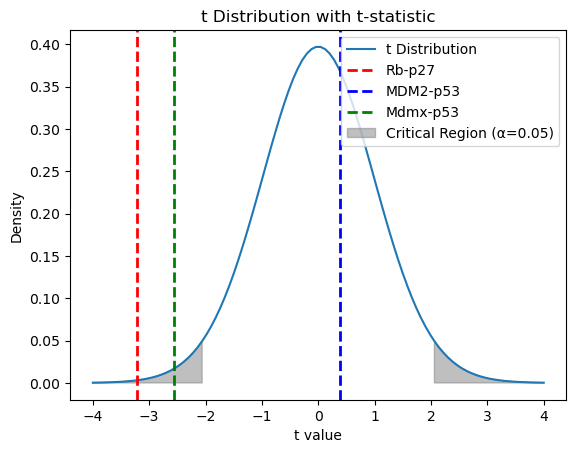

In [201]:
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# サンプルサイズと自由度
n = len(data)
df1 = n - 1

# t値の範囲を設定
t_values = np.linspace(-4, 4, 100)
# t分布を計算
t_dist = t.pdf(t_values, df1)

# t検定の結果
t_stat1, p_value1 = ttest_1samp(data, x1, alternative='less')
t_stat2, p_value2 = ttest_1samp(data, x2, alternative='less')
t_stat3, p_value3 = ttest_1samp(data, x3, alternative='less')

# 図の作成
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat1, color='red', linestyle='dashed', linewidth=2, label=f'Rb-p27')
plt.axvline(x=t_stat2, color='blue', linestyle='dashed', linewidth=2, label=f'MDM2-p53')
plt.axvline(x=t_stat3, color='green', linestyle='dashed', linewidth=2, label=f'Mdmx-p53')

plt.fill_between(t_values, t_dist, where=(t_values > t.ppf(0.975, df1)) | (t_values < t.ppf(0.025, df1)), color='gray', alpha=0.5, label='Critical Region (α=0.05)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()

In [202]:
rm_node

,rm_node,score
12,E2F1,2.085938
0,CCNE1,2.072266
10,BCL2,1.243164
15,MDM4,1.241211
16,SKP2,1.231445
14,CDKN2A,1.228516
5,MDM2,1.225586
17,CDKN1B,1.222656
6,CDKN1A,1.222656
8,CCNG1,1.213867


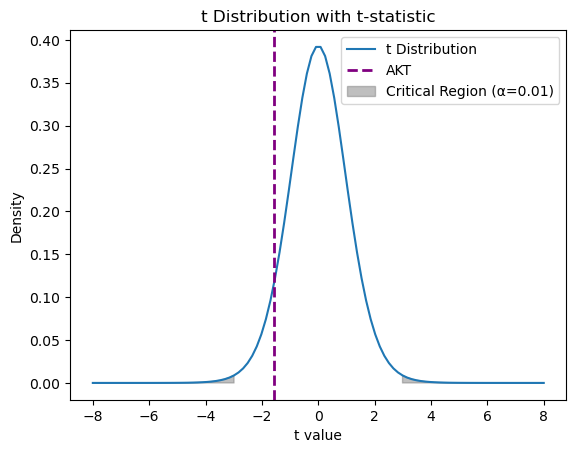

In [203]:
data = rm_node.score.values
data = -data
x = -1.182617

# サンプルサイズと自由度
n = len(data)
df = n - 1

# t値の範囲を設定
t_values = np.linspace(-8, 8, 100)
# t分布を計算
t_dist = t.pdf(t_values, df)

# t検定の結果
t_stat4, p_value4 = ttest_1samp(data, x, alternative='less')

# 図の作成
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat4, color='purple', linestyle='dashed', linewidth=2, label=f'AKT')

plt.fill_between(t_values, t_dist, where=(t_values > t.ppf(0.995, df)) | (t_values < t.ppf(0.005, df)), color='gray', alpha=0.5, label='Critical Region (α=0.01)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()

In [204]:
Act_node

,act_node,score
1,CASP1,4.0
9,PPM1D,2.0
16,SKP2,2.0
15,MDM4,2.0
14,CDKN2A,2.0
13,AKT1,2.0
12,E2F1,2.0
11,BAX,2.0
10,BCL2,2.0
17,CDKN1B,2.0


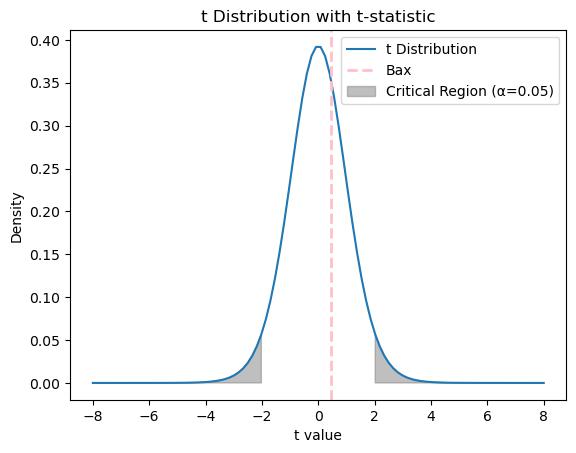

In [207]:
data = Act_node.score.values
x = 2.0

# サンプルサイズと自由度
n = len(data)
df = n - 1

# t値の範囲を設定
t_values = np.linspace(-8, 8, 100)
# t分布を計算
t_dist = t.pdf(t_values, df)

# t検定の結果
t_stat5, p_value5 = ttest_1samp(data, x, alternative='greater')

# 図の作成
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat5, color='pink', linestyle='dashed', linewidth=2, label=f'Bax')

plt.fill_between(t_values, t_dist, where=(t_values > t.ppf(0.975, df1)) | (t_values < t.ppf(0.025, df1)), color='gray', alpha=0.5, label='Critical Region (α=0.05)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()

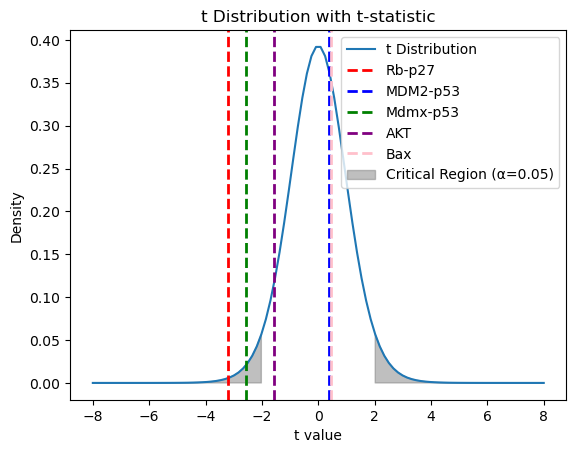

In [208]:
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat1, color='red', linestyle='dashed', linewidth=2, label=f'Rb-p27')
plt.axvline(x=t_stat2, color='blue', linestyle='dashed', linewidth=2, label=f'MDM2-p53')
plt.axvline(x=t_stat3, color='green', linestyle='dashed', linewidth=2, label=f'Mdmx-p53')
plt.axvline(x=t_stat4, color='purple', linestyle='dashed', linewidth=2, label=f'AKT')
plt.axvline(x=t_stat5, color='pink', linestyle='dashed', linewidth=2, label=f'Bax')

plt.fill_between(t_values, t_dist, where=(t_values > t.ppf(0.975, df1)) | (t_values < t.ppf(0.025, df1)), color='gray', alpha=0.5, label='Critical Region (α=0.05)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()